Bias for size = 20: sample_variance = -0.07257875810065702, correct_variance = -0.021055355772915747
Bias for size = 30: sample_variance = -0.03480106336829695, correct_variance = -0.0003296727743075607
Bias for size = 40: sample_variance = -0.027433361752741713, correct_variance = -0.0018395028514980743
Bias for size = 50: sample_variance = -0.02689149161575948, correct_variance = -0.006618397691087803
Bias for size = 60: sample_variance = -0.023114138716273186, correct_variance = -0.006271279038967553
Bias for size = 70: sample_variance = -0.016632349703125875, correct_variance = -0.002171060728171848
Bias for size = 80: sample_variance = -0.006083806436933743, correct_variance = 0.006658708865156848
Bias for size = 90: sample_variance = -0.0077896047775679435, correct_variance = 0.0034855133499596975
Bias for size = 100: sample_variance = -0.007592233716356689, correct_variance = 0.0025343761436804925
Bias for size = 110: sample_variance = -0.009335415430379178, correct_variance = -

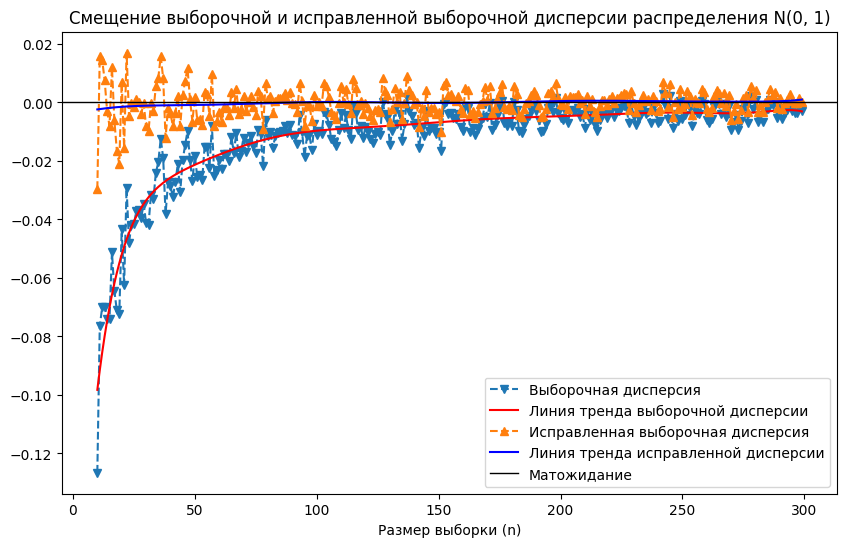

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Вариант 6
# Функция генерации выборки - будем использовать стандартное нормальное распределение
def generate_sample(size):
    return np.random.normal(0, 1, size)

# Функция расчета дисперсии
def calc_variance(x, bias=False):
    mean = np.mean(x)
    if bias:
        return np.sum((x - mean)**2) / x.shape[0]
    else:
        return np.sum((x - mean)**2) / (x.shape[0] - 1)

# Определение размеров выборки
sample_sizes = np.arange(10, 300)
bias_vars = []
correct_vars = []
# N - количество повторений эксперимента для выборки конкретного размера
N = 1000

for size in sample_sizes:
    bias = []
    correct = []
    for experiment in range(N):
        sample = generate_sample(size)

        sample_var = calc_variance(sample, bias=True)
        correct_var = calc_variance(sample, bias=False)

        bias.append(sample_var - 1)
        correct.append(correct_var - 1)

    if size % 10 == 9:
        print(f'Bias for size = {size + 1}: sample_variance = {np.mean(bias)}, correct_variance = {np.mean(correct)}')

    # Усреднение результатов экспериментов
    bias_vars.append(np.mean(bias))
    correct_vars.append(np.mean(correct))

# Построение линий тренда
trend_bias = np.polyfit(sample_sizes, bias_vars, 10)
p = np.poly1d(trend_bias)
trend_correct = np.polyfit(sample_sizes, correct_vars, 10)
q = np.poly1d(trend_correct)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, bias_vars, label='Выборочная дисперсия', linestyle='--', marker='v')
plt.plot(sample_sizes, p(sample_sizes), label='Линия тренда выборочной дисперсии', color='red')
plt.plot(sample_sizes, correct_vars, label='Исправленная выборочная дисперсия', linestyle='--', marker='^')
plt.plot(sample_sizes, q(sample_sizes), label='Линия тренда исправленной дисперсии', color='blue')
plt.axhline(0, color='black', linewidth=1, linestyle='-', label='Матожидание')

plt.title('Смещение выборочной и исправленной выборочной дисперсии распределения N(0, 1)')
plt.xlabel('Размер выборки (n)')
plt.legend()
plt.show()

# Вывод по результатам моделирования: выборочная дисперсия действительно имеет смещение,
# но при n -> inf стремится к истинной дисперсии